In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from collections import Counter
import warnings
warnings.filterwarnings('ignore')                     

In [2]:
#loading csv file
df = pd.read_csv(r"C:\Users\Siddhant Sonawane\Downloads\glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Description - Above data represents various constitients of glass.Constitute Silica has maximum weight percent in glass bacause silicon is principal compenent of glass followed by sodium and calcium.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
#checking null values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
#checking duplicates
df.duplicated().sum()

1

In [7]:
#droping duplicate
df.drop_duplicates(inplace=True)

In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
#checking unique value of 'type'
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [10]:
df.Type.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

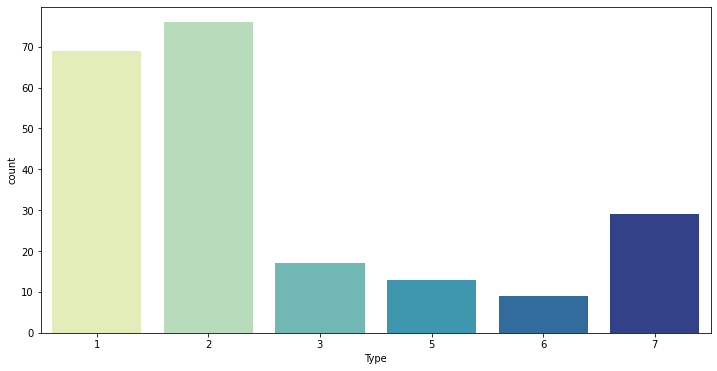

In [11]:
#Univariate analysis
# data visulization 'Type'
plt.figure(figsize=(12,6))
sns.countplot(df['Type'],palette='YlGnBu')

<AxesSubplot:>

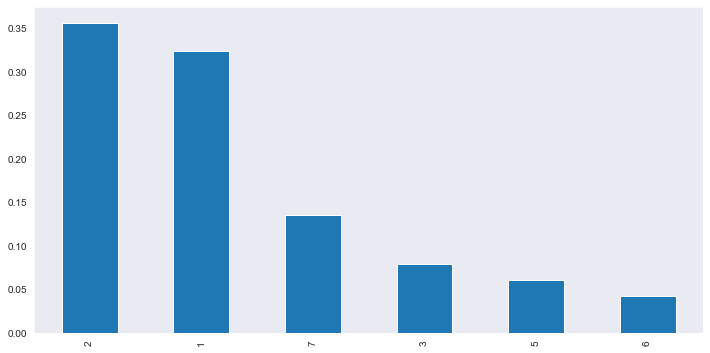

In [12]:
# plotting relative percent of each 'Type'
sns.set_style(style='dark')
plt.figure(figsize=(12,6))
(df['Type'].value_counts()/len(df)).plot.bar()

*The above graph tells that the Type-2 which is building_windows_non_float_processed has ralatively high perecent than any other types in data.Type-1 is the second highest and Type-6 has the lowest relative perecent.

In [13]:
#columns od data
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

<AxesSubplot:ylabel='Frequency'>

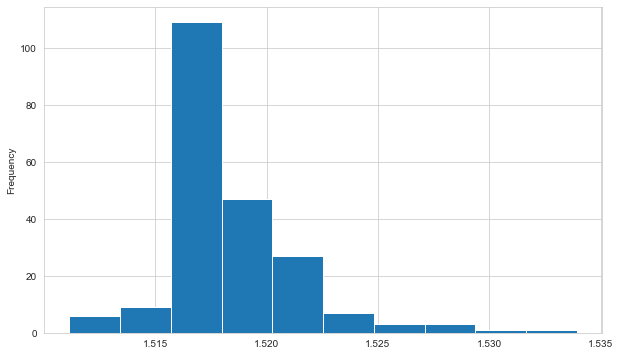

In [14]:
#plotting numerical features

# RI
sns.set_style(style='whitegrid')
plt.figure(figsize=(10,6))
df['RI'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

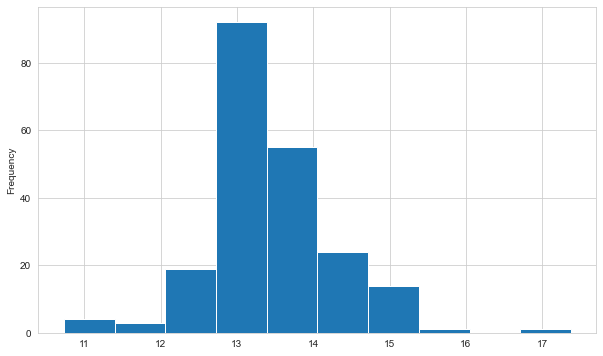

In [15]:
#Na
plt.figure(figsize=(10,6))
df['Na'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

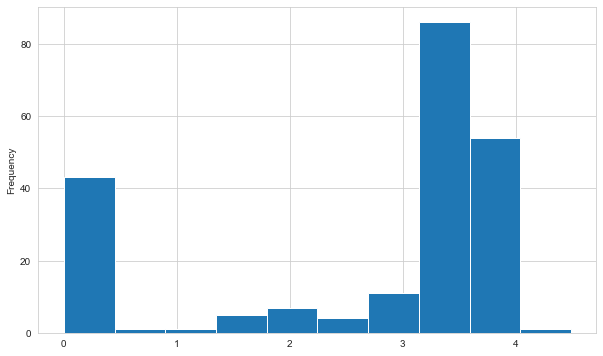

In [16]:
#MgKDE 
plt.figure(figsize=(10,6))
df['Mg'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

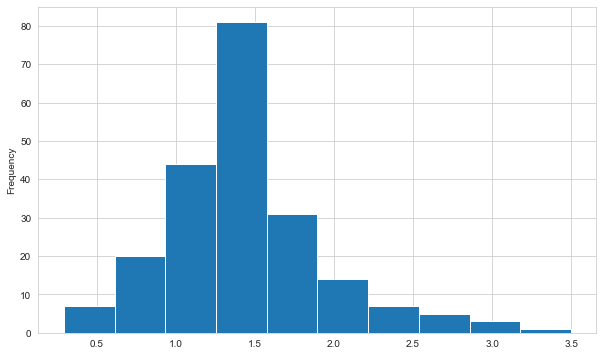

In [17]:
#Al 
plt.figure(figsize=(10,6))
df['Al'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

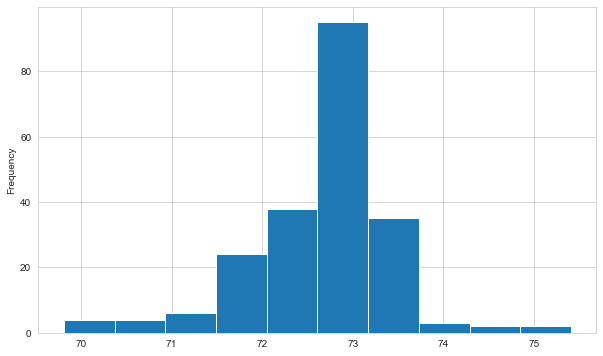

In [18]:
#Si 
plt.figure(figsize=(10,6))
df['Si'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

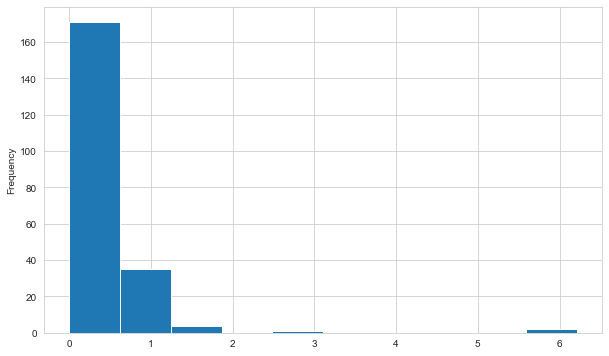

In [19]:
#K
plt.figure(figsize=(10,6))
df['K'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

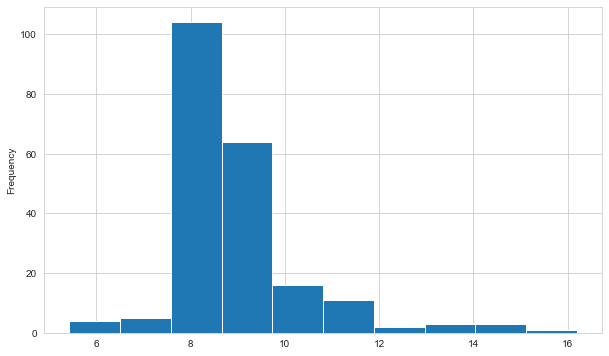

In [20]:
#Ca
plt.figure(figsize=(10,6))
df['Ca'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

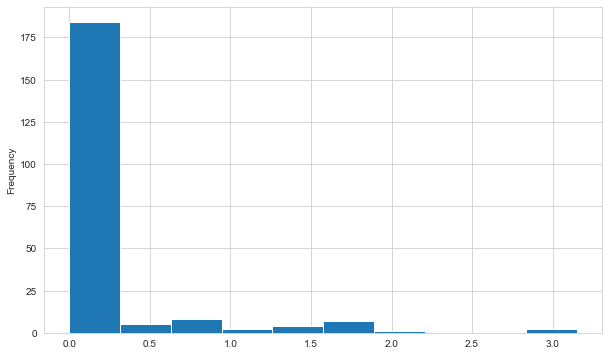

In [21]:
#Ba
plt.figure(figsize=(10,6))
df['Ba'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

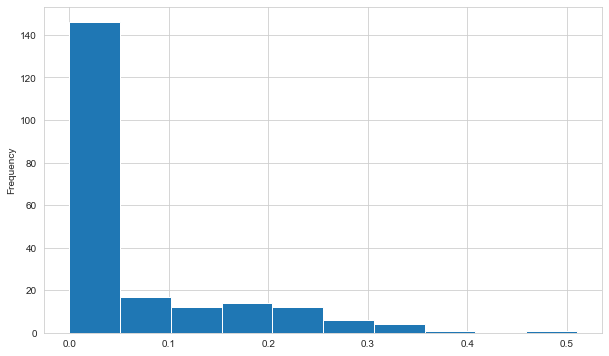

In [22]:
#Fe
plt.figure(figsize=(10,6))
df['Fe'].plot(kind='hist')

*From above graphs of numerical features it is clear that not all the numerical features are normally distributed and also some are skewed meaning that the amount of constituents present in the mixture is not same.the graphs also reveling presence of 'outliers' in the data set.

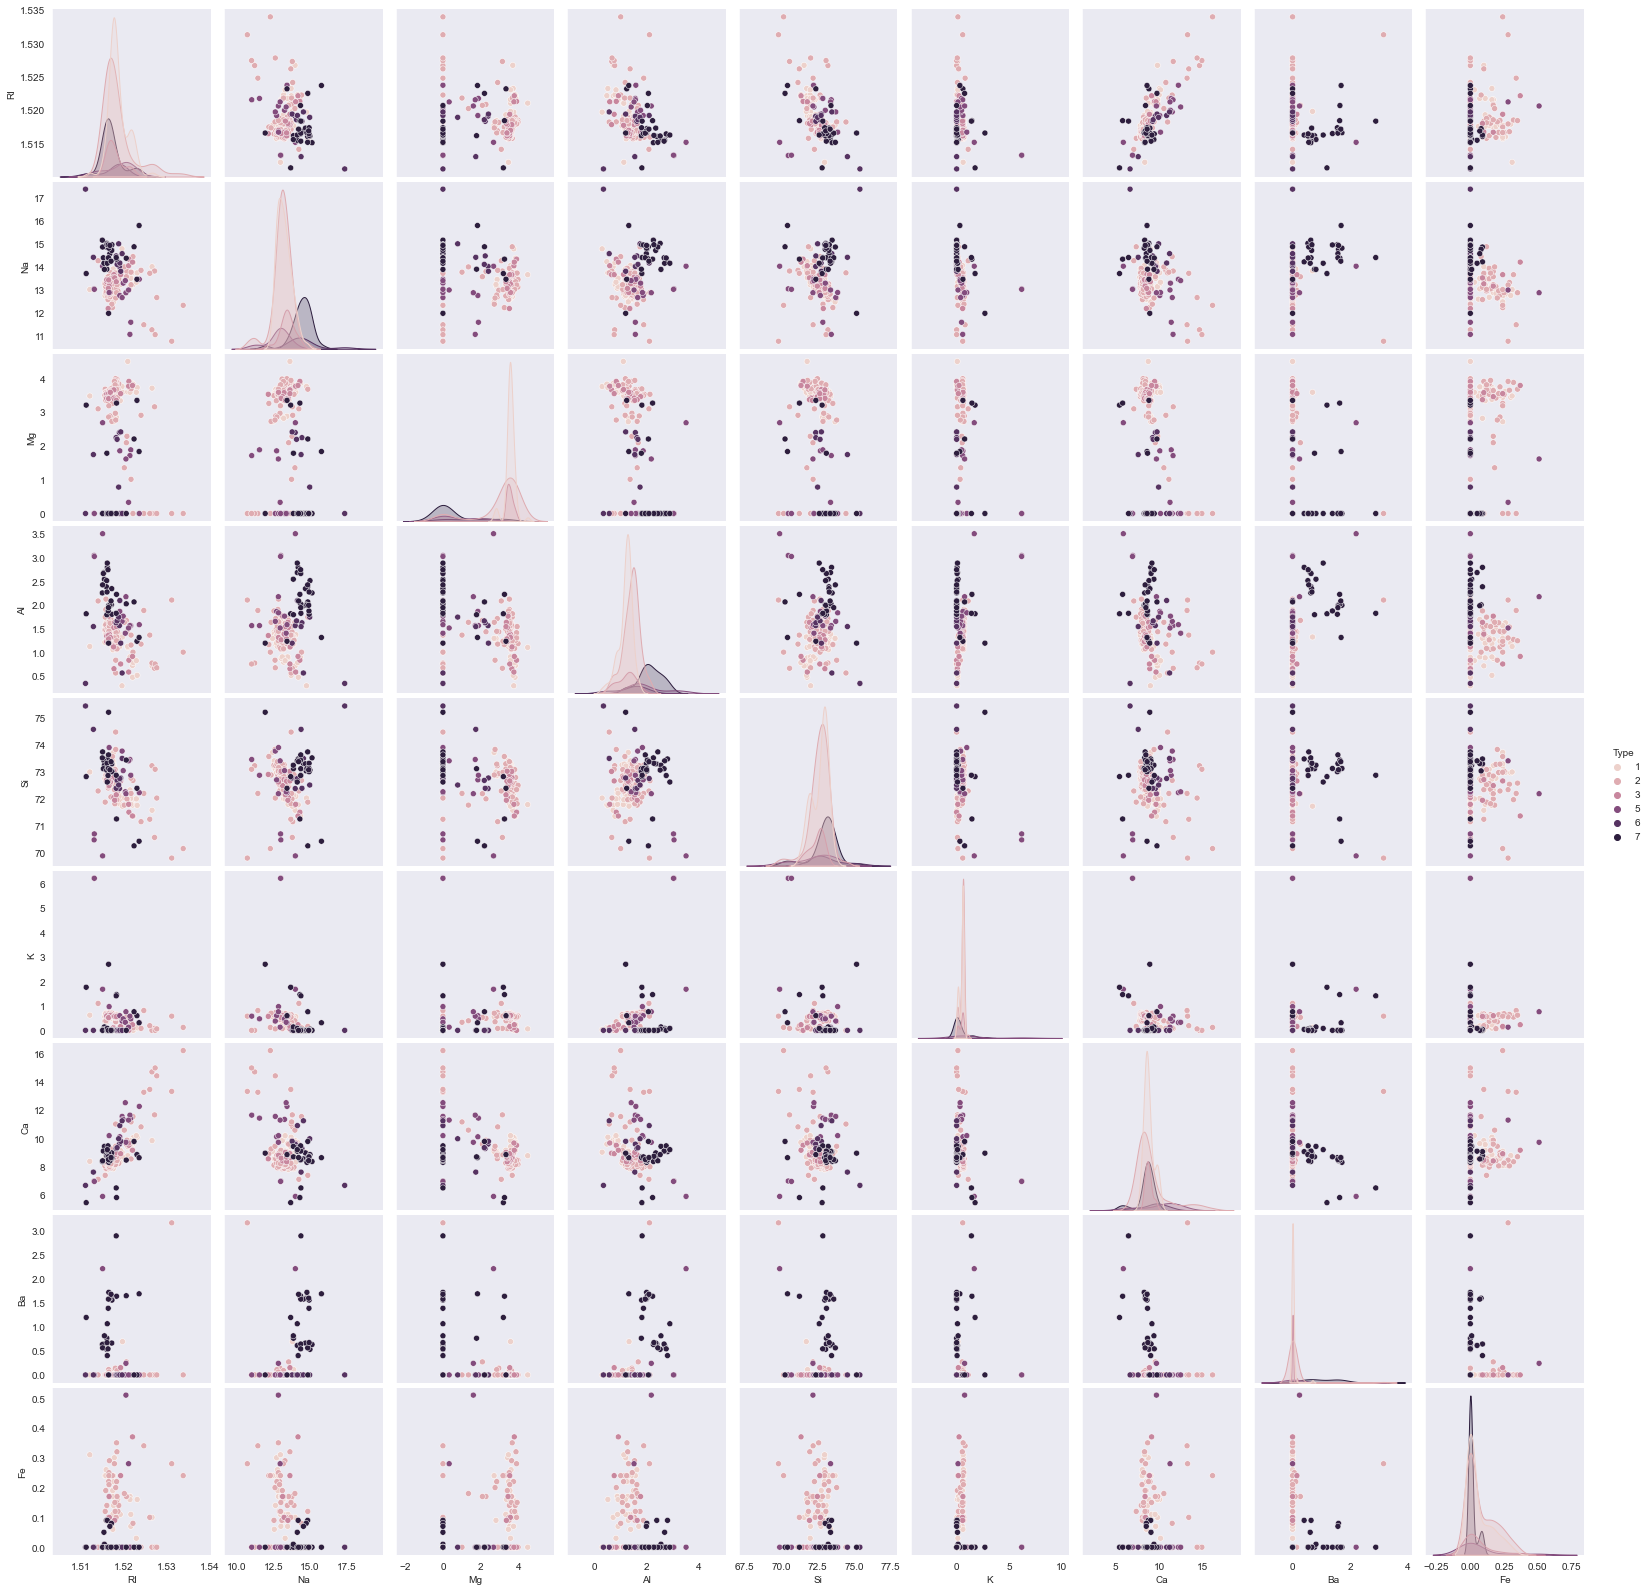

In [23]:
# multivariate analysis
# correlation of data explained visually
sns.set_style('dark')
sns.pairplot(df,hue='Type')

In [24]:
#correlation 
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


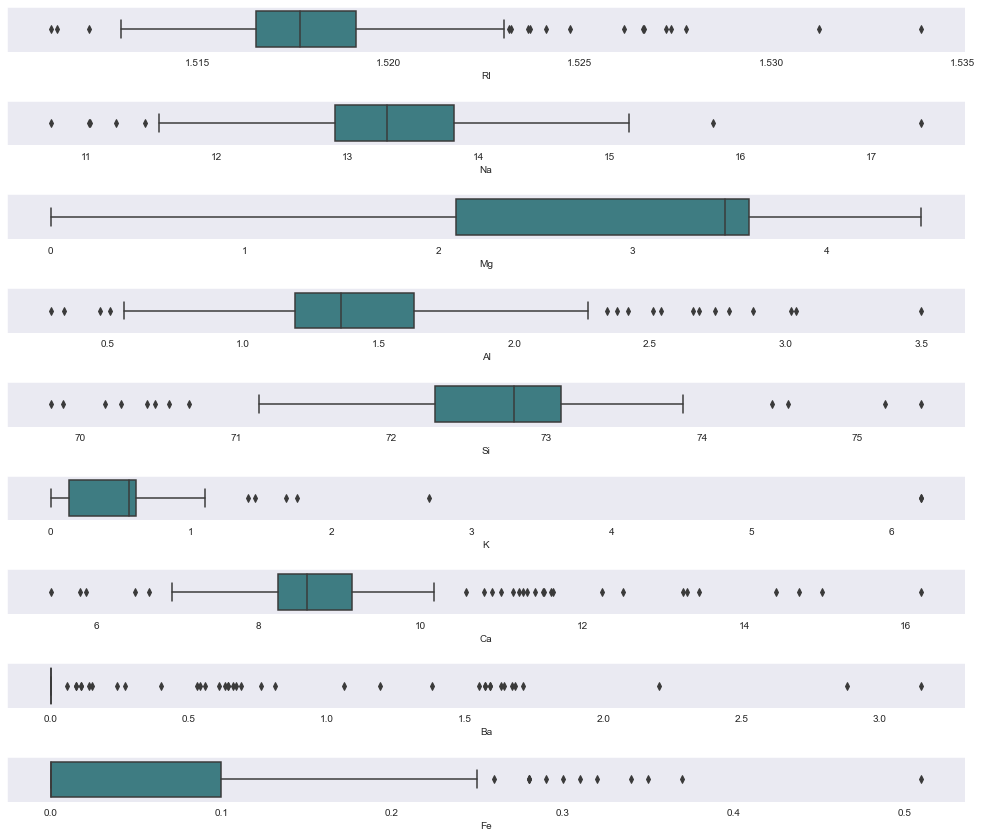

In [25]:
#detecting multiple outliers
ot= df.copy() 
fig, axes=plt.subplots(9,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='RI',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Na',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Mg',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Al',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Si',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='K',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Ca',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Ba',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Fe',data=ot,palette='crest',ax=axes[8])
plt.tight_layout(pad=2.0)

In [26]:
# Detect observations with more than one outlier 

#making an object of input data
features = df

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 3 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 3 outliers' %(len(outlier_hunt(features)))) 


The dataset contains 8 observations with more than 3 outliers


In [27]:
#dropping outliers
outlier_indices = outlier_hunt(features)
df_1 =  features.drop(outlier_indices).reset_index(drop=True)
print(df_1.shape)
df_1.head()

(205, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [28]:
df_2 = df_1.iloc[:,:-1]
df_2.head(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0


KNN can be very sensitive to the scale of data as it relies on computing the distances. For features with a higher scale, the calculated distances can be very high and might produce poor results.thus we are normalizing data.

In [29]:
# importing library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaled_df = sc.fit_transform(df_2)

In [30]:
scaled_df

array([[ 0.96462292,  0.35784662,  1.24239236, ..., -0.1795979 ,
        -0.33691946, -0.59149218],
       [-0.25136163,  0.70459723,  0.61405006, ..., -0.88365453,
        -0.33691946, -0.59149218],
       [-0.76279042,  0.20527636,  0.57874993, ..., -0.92191848,
        -0.33691946, -0.59149218],
       ...,
       [ 0.83587161,  1.35648836, -1.92755926, ..., -0.41683438,
         4.24344135, -0.59149218],
       [-0.64476839,  1.38422841, -1.92755926, ..., -0.38622322,
         4.04793815, -0.59149218],
       [-0.43018288,  1.17617805, -1.92755926, ..., -0.27908417,
         4.32722844, -0.59149218]])

In [31]:
glass = pd.DataFrame(scaled_df,columns=df_2.columns)

In [32]:
glass['Type']=df_1['Type']

In [33]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,205.000000
mean,-4.571059e-14,-2.551888e-15,3.054467e-16,-1.711368e-16,1.201261e-14,2.924490e-17,-3.885781e-16,-9.358368e-16,-1.440582e-16,2.687805
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,2.041265
min,-2.204090e+00,-3.276100e+00,-1.927559e+00,-2.435232e+00,-3.688156e+00,-7.432317e-01,-1.572406e+00,-3.369195e-01,-5.914922e-01,1.000000
25%,-6.376155e-01,-6.685352e-01,-3.461135e-01,-5.176856e-01,-5.213166e-01,-5.571401e-01,-5.469318e-01,-3.369195e-01,-5.914922e-01,1.000000
50%,-2.334795e-01,-1.553443e-01,5.293297e-01,-1.554824e-01,1.791826e-01,1.096881e-01,-2.943897e-01,-3.369195e-01,-5.914922e-01,2.000000
75%,2.851021e-01,5.520270e-01,6.211101e-01,3.984755e-01,6.024008e-01,1.872263e-01,1.265137e-01,-3.369195e-01,4.556226e-01,3.000000
max,5.585364e+00,2.452220e+00,1.242392e+00,3.423938e+00,3.637897e+00,8.887009e+00,5.514077e+00,4.438945e+00,4.748793e+00,7.000000


In [34]:
#Train and split 
X = glass.iloc[:,:-1]
Y = glass[['Type']]

In [35]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.964623,0.357847,1.242392,-0.709440,-1.323972,-0.650186,-0.179598,-0.336919,-0.591492
1,-0.251362,0.704597,0.614050,-0.155482,0.062433,0.001135,-0.883655,-0.336919,-0.591492
2,-0.762790,0.205276,0.578750,0.228027,0.441870,-0.138434,-0.921918,-0.336919,-0.591492
3,-0.233479,-0.238564,0.677590,-0.304625,-0.112692,0.140703,-0.585196,-0.336919,-0.591492
4,-0.319314,-0.155344,0.628170,-0.411155,0.573213,0.109688,-0.699988,-0.336919,-0.591492
...,...,...,...,...,...,...,...,...,...
200,-0.744908,1.051348,-1.927559,3.083041,-0.112692,-0.619171,0.149472,2.623558,-0.591492
201,-0.523170,2.133210,-1.927559,1.186800,0.544026,-0.743232,-0.447446,4.103796,-0.591492
202,0.835872,1.356488,-1.927559,1.250718,1.069400,-0.743232,-0.416834,4.243441,-0.591492
203,-0.644768,1.384228,-1.927559,1.080270,1.346681,-0.743232,-0.386223,4.047938,-0.591492


In [36]:
Y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
200,7
201,7
202,7
203,7


### Building KNN model Using Hyper-parameter tuning 

In [41]:
#importing library 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [42]:
#creating object 
n_neigh = np.array([2*i+1 for i in range(1,20)])
prams_grid = dict(n_neighbors = n_neigh)

In [43]:
#model
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=prams_grid,cv =10)

#fitting on grid object
grid.fit(X,Y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [44]:
print(grid.best_score_)
print(grid.best_params_)

0.6623809523809524
{'n_neighbors': 5}


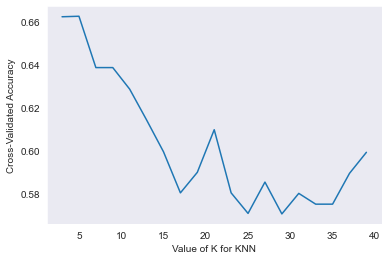

In [45]:
# visualizing CV results

k_range = ([2*i+1  for i in range(1,20)])
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(score.mean())
    
#plot to see clearly
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

From cv result, best score we can get is 0.66 for k=5

In [48]:
#building knn model with k=5

#importing k-fold
from sklearn.model_selection import KFold
k_fold = KFold(n_splits = 10)

#model
model_knn = KNeighborsClassifier(n_neighbors = 5)
result = cross_val_score(model_knn,X,Y,cv=k_fold)

In [51]:
print(result.mean())

0.5573809523809524
